# **Flight Delay Prediction using Machine Learning**
![](https://i.imgur.com/mKZs1U2.jpeg)



* Dataset used - [Flight Data](www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv')
* This dataset contain 52million rows and 31 columns.
* We will train the Machine Learning model to predict the delay in Airlines, by the help of Arrival_Delay, Departure_Delay, Wheeled_off, Departure_time, Elapsed_time and all.

## Outline of the Project

* **Select and download real-world dataset**
* **Import and Install all the libraries**
* **Perform data preparation & cleaning**
* **Ask & answer questions about the data**
* **Perform exploratory analysis & visualization**
* **Train and evaluate the ML Model**
* **Prdeict the Target Column**
* **Compare the RMSE and Validation Outputs**
* **Summarize your inferences & write a conclusion**



**What is machine Learning?**

Machine Learning is the process where we train our system to learn some data and then give us some prediction based on the data we supplied.It leads to the Artificial Intelligence when the machine gets trained enough and dvelope the decision making capabilities.We use different algorithms like the Linear Regression, Logistic Regression, Random Forest , Decision Trees and all.

# Step1 -Install and import the required libraries

In [176]:
!pip install jovian opendatasets pandas seaborn numpy scikit-learn xgboost --quiet

In [177]:
import jovian
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [178]:
!pip install -upgrade seaborn


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


## Downloading the data set using opendatasets()

In [179]:
data_url = 'https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv'

In [180]:
od.download(data_url)

Skipping, found downloaded files in "./flight-delays" (use force=True to force download)


In [181]:
data_dir = 'flight-delays'

In [182]:
!ls -lh {data_dir}

total 565M
-rw-r--r-- 1 root root  359 Apr 25 07:19 airlines.csv
-rw-r--r-- 1 root root  24K Apr 25 07:19 airports.csv
-rw-r--r-- 1 root root 565M Apr 25 07:19 flights.csv


In [183]:
!wc -l {data_dir}/flights.csv

5819080 flight-delays/flights.csv


The flights.csv file contains the 58million records of flights

In [184]:
dtypes = {
    'ORIGIN_AIRPORT' : "object",
    'DESTINATION_AIRPORT':"object"
}

Since its too latge and distributed we will use 140000 records for our training and prediction

In [185]:
import pandas as pd
flight_df = pd.read_csv(data_dir+'/flights.csv',dtype= dtypes,nrows =140000)

In [186]:
flight_data = flight_df.copy()

## Dataset information

In [187]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 140000 non-null  int64  
 1   MONTH                140000 non-null  int64  
 2   DAY                  140000 non-null  int64  
 3   DAY_OF_WEEK          140000 non-null  int64  
 4   AIRLINE              140000 non-null  object 
 5   FLIGHT_NUMBER        140000 non-null  int64  
 6   TAIL_NUMBER          139705 non-null  object 
 7   ORIGIN_AIRPORT       140000 non-null  object 
 8   DESTINATION_AIRPORT  140000 non-null  object 
 9   SCHEDULED_DEPARTURE  140000 non-null  int64  
 10  DEPARTURE_TIME       136302 non-null  float64
 11  DEPARTURE_DELAY      136302 non-null  float64
 12  TAXI_OUT             136183 non-null  float64
 13  WHEELS_OFF           136183 non-null  float64
 14  SCHEDULED_TIME       140000 non-null  int64  
 15  ELAPSED_TIME     

## Statistical Description

In [188]:
flight_data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,140000.0,140000.0,140000.000000,140000.000000,140000.000000,140000.000000,136302.000000,136302.000000,136183.000000,136183.000000,...,140000.000000,136035.000000,135787.000000,140000.000000,140000.000000,45218.000000,45218.000000,45218.000000,45218.000000,45218.000000
mean,2015.0,1.0,4.982579,4.106429,2242.926036,1321.725371,1341.009061,18.922202,17.073225,1363.715816,...,1500.876771,1480.875326,16.912547,0.002586,0.027507,14.201690,0.071830,17.782211,26.166305,3.415454
std,0.0,0.0,2.533886,1.820333,1817.281353,471.249193,490.920341,45.408369,10.681587,491.656109,...,489.281974,526.860353,48.623049,0.050784,0.163556,27.414501,1.737352,42.684258,43.481599,19.815410
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-42.000000,1.000000,1.000000,...,1.000000,1.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,3.000000,3.000000,752.000000,923.000000,931.000000,-3.000000,11.000000,946.000000,...,1120.000000,1109.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,5.000000,4.000000,1697.500000,1320.000000,1336.000000,2.000000,14.000000,1349.000000,...,1522.000000,1518.000000,3.000000,0.000000,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000
75%,2015.0,1.0,7.000000,5.000000,3429.000000,1720.000000,1737.000000,23.000000,19.000000,1752.000000,...,1912.000000,1917.000000,24.500000,0.000000,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000
max,2015.0,1.0,9.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,824.000000,107.000000,1380.000000,891.000000,771.000000




*   Departure Delay - on an avg there is a delay of 18.92 seconds
*   Arrival Delay - Flights land at arrival delay of 16.9 seconds on average.
*   Only a fraction of flights are diverted , less than 0.1%
*   Hardly flights are getting cancelled





## Plotting the Central Tendencies of our numeric columns

In [189]:
num_col = flight_data._get_numeric_data().columns

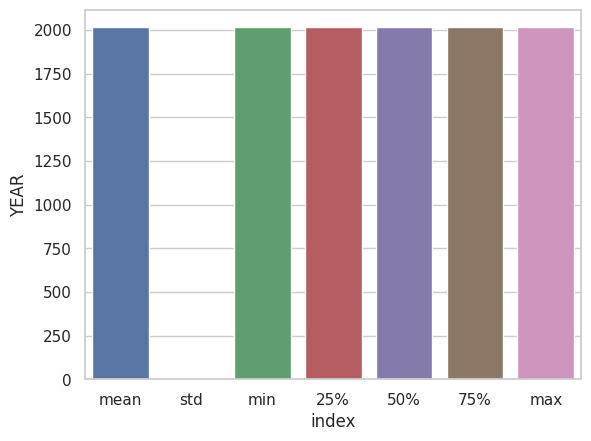

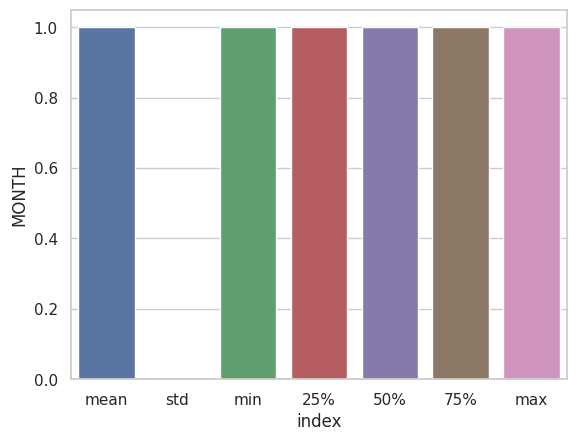

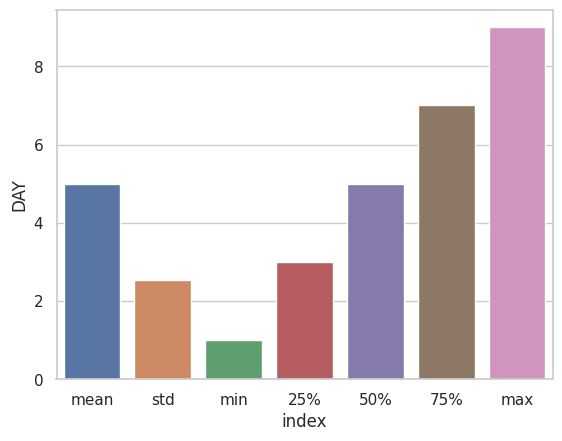

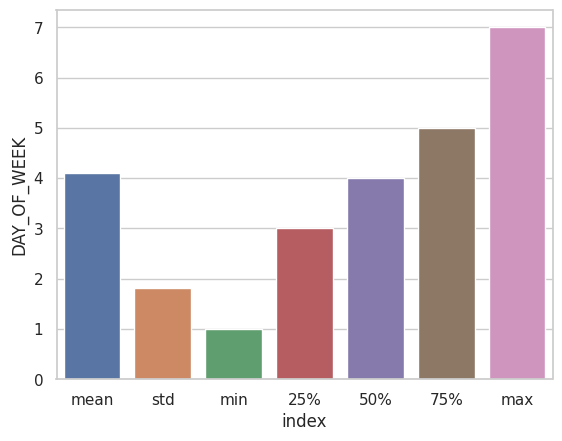

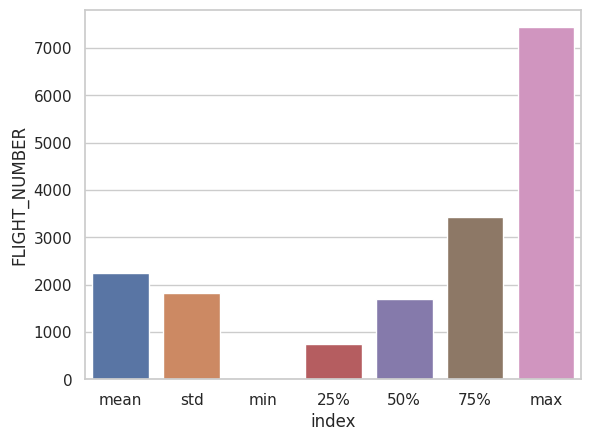

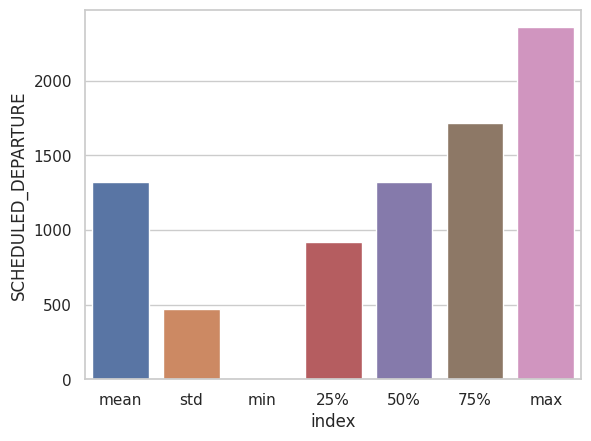

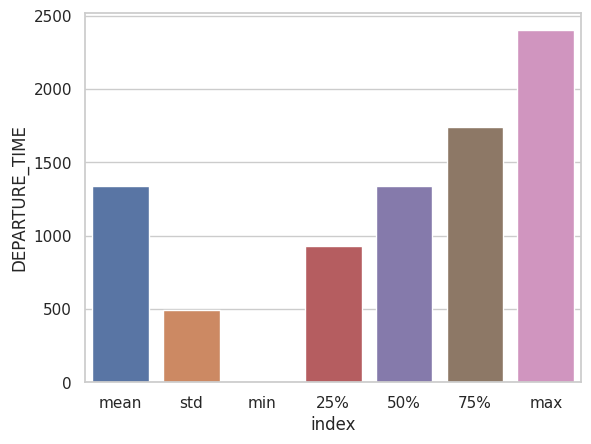

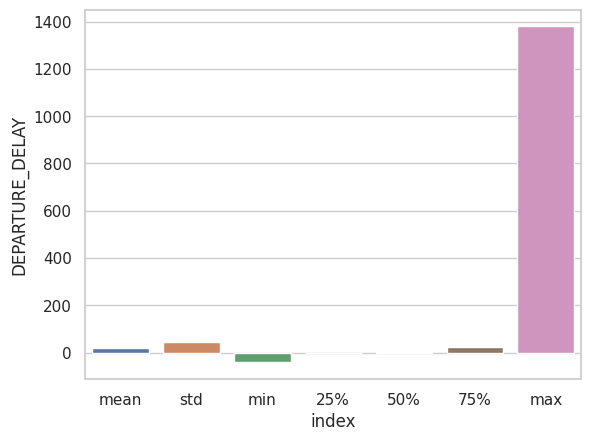

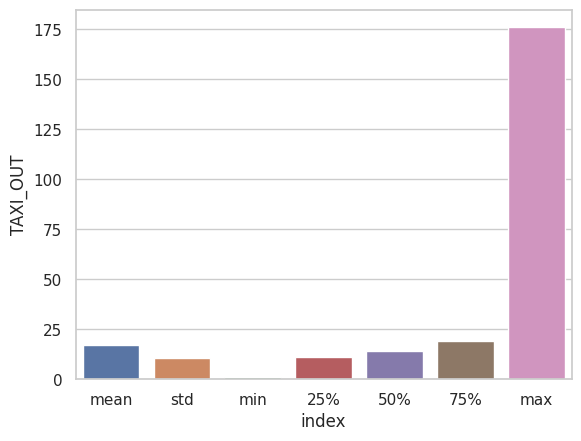

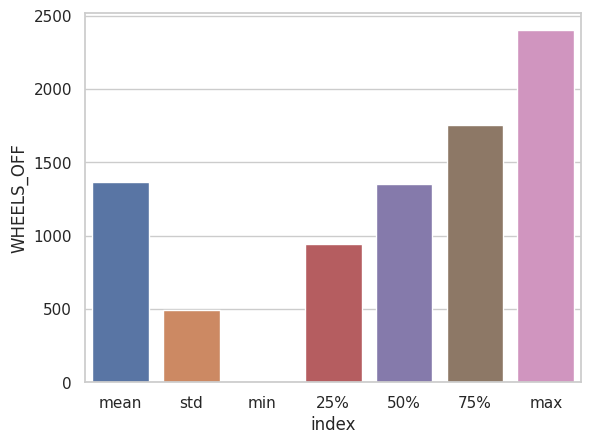

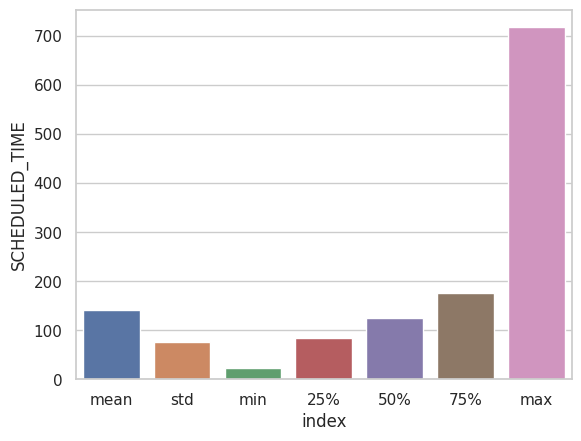

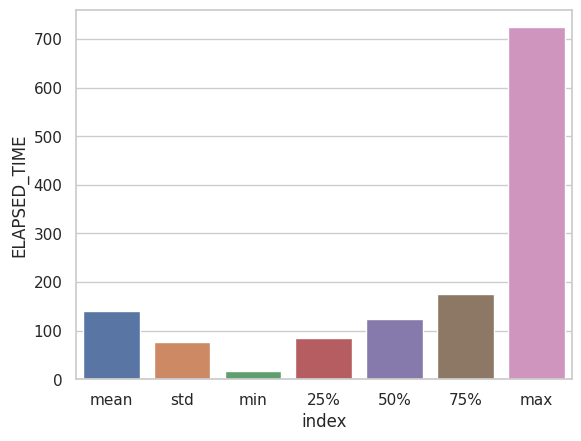

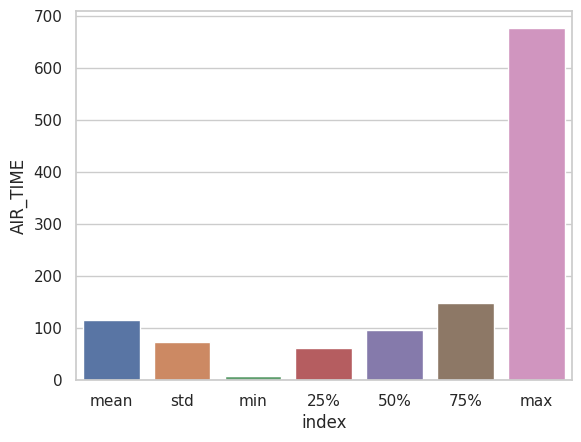

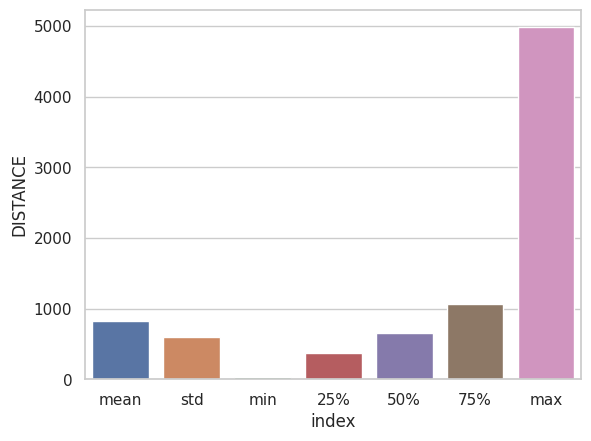

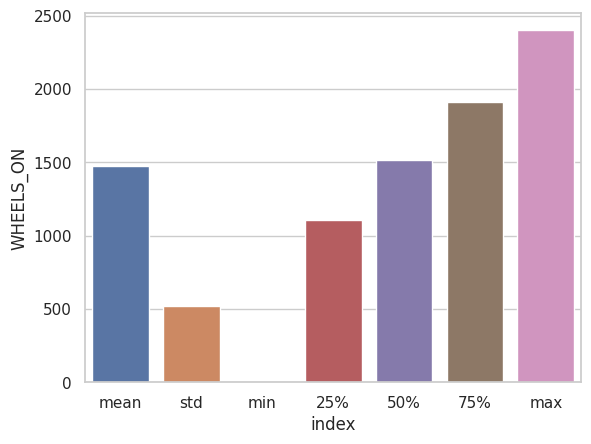

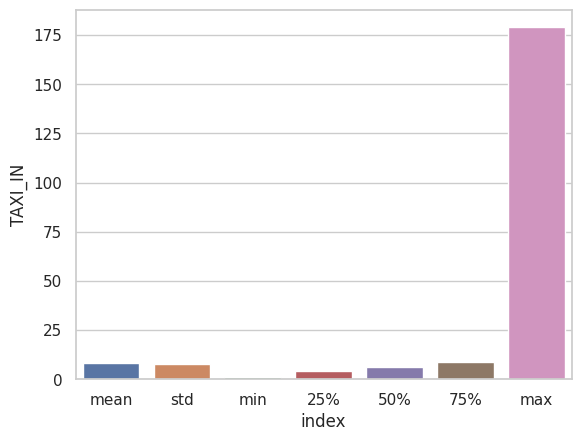

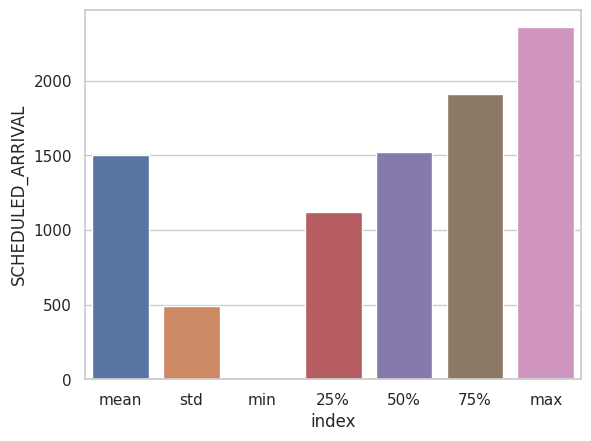

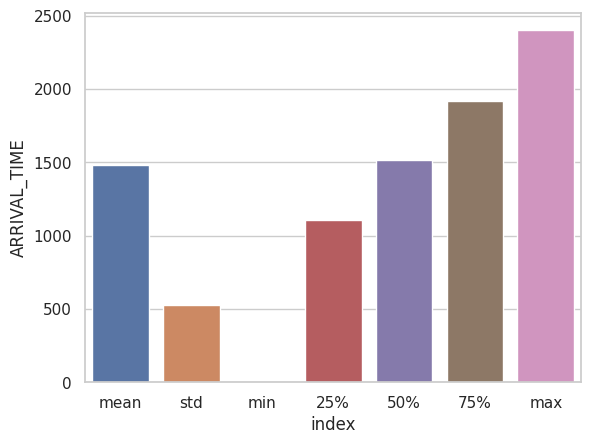

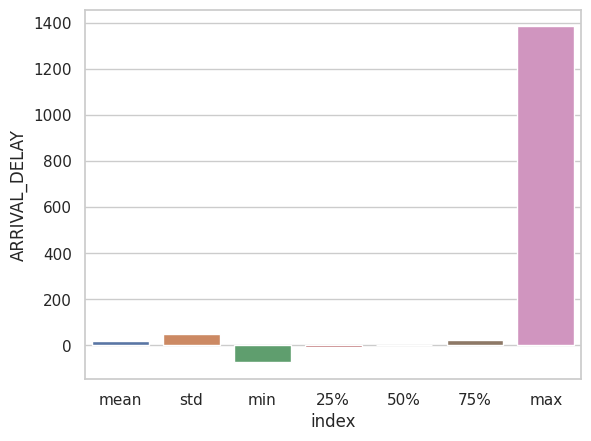

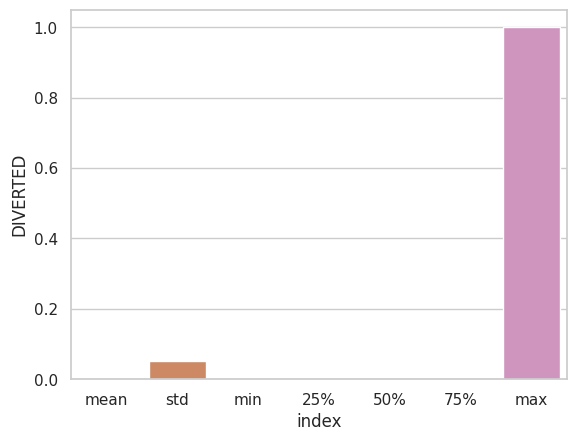

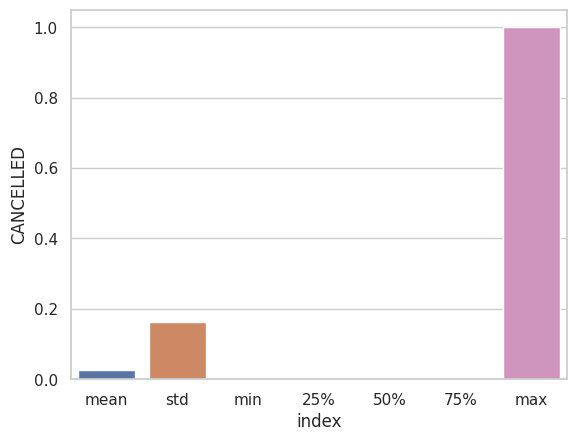

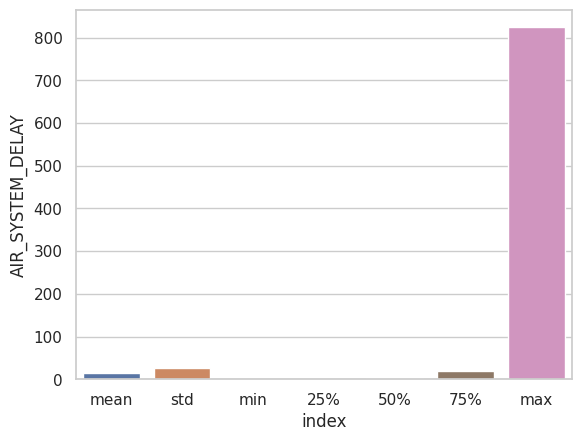

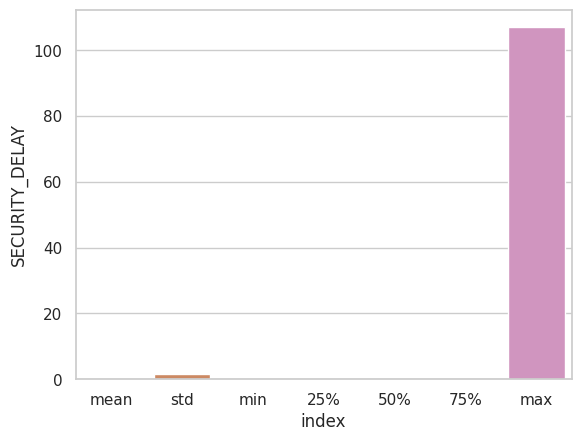

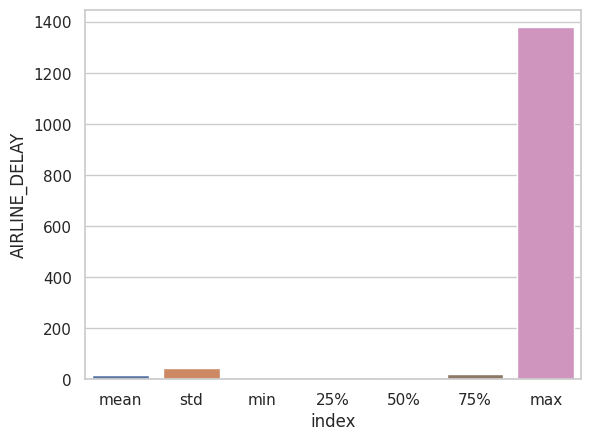

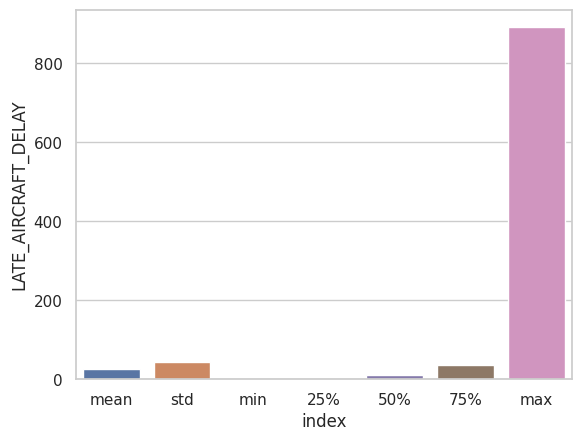

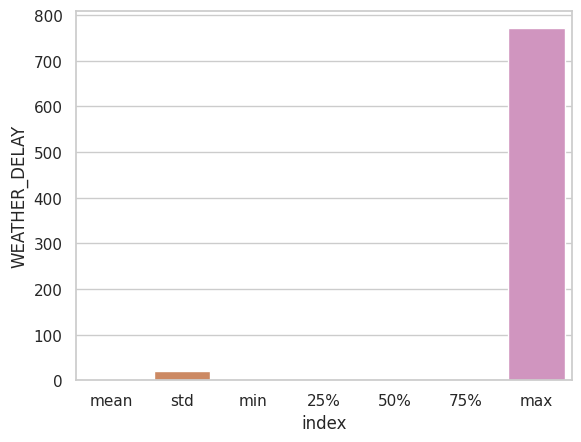

In [190]:
describe_df = flight_data.describe(include=['int64','float64'])
describe_df.reset_index(inplace=True)
# To remove any variable from plot
describe_df = describe_df[describe_df['index'] != 'count']
for i in num_col:
  if i in ['index']:
    continue
  sns.barplot(x='index', y= i, data=describe_df)
  plt.show()

## Null values

### Plotting the null values against the columns

In [191]:
flight_data.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER               295
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME           3698
DEPARTURE_DELAY          3698
TAXI_OUT                 3817
WHEELS_OFF               3817
SCHEDULED_TIME              0
ELAPSED_TIME             4213
AIR_TIME                 4213
DISTANCE                    0
WHEELS_ON                3965
TAXI_IN                  3965
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             3965
ARRIVAL_DELAY            4213
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    136149
AIR_SYSTEM_DELAY        94782
SECURITY_DELAY          94782
AIRLINE_DELAY           94782
LATE_AIRCRAFT_DELAY     94782
WEATHER_DELAY           94782
dtype: int64

In [192]:
null_df = flight_data.apply(lambda x: sum(x.isnull())).to_frame(name='count').reset_index()

In [193]:
null_df

,index,count
0,YEAR,0
1,MONTH,0
2,DAY,0
3,DAY_OF_WEEK,0
4,AIRLINE,0
5,FLIGHT_NUMBER,0
6,TAIL_NUMBER,295
7,ORIGIN_AIRPORT,0
8,DESTINATION_AIRPORT,0
9,SCHEDULED_DEPARTURE,0


In [194]:
fig= px.bar(null_df,
            x='count',
            y='index',
            title = 'Null Values in the dataframe');
fig.show()

The number of Null values are limited to the arrival, departure and late aircraft delay,

## Combining the Airlines and Flights dataframe

In [195]:
airlines_df = pd.read_csv(data_dir+'/airlines.csv')

In [196]:
airlines_df

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [197]:
flight_data = flight_data.merge(airlines_df,left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [198]:
flight_data = flight_data.drop(['AIRLINE_x','IATA_CODE'], axis=1)


In [199]:
flight_data = flight_data.rename(columns={"AIRLINE_y":"AIRLINE"})

# Step2- Data Visualization

## Plot the Flight Delays as per Flight Operators

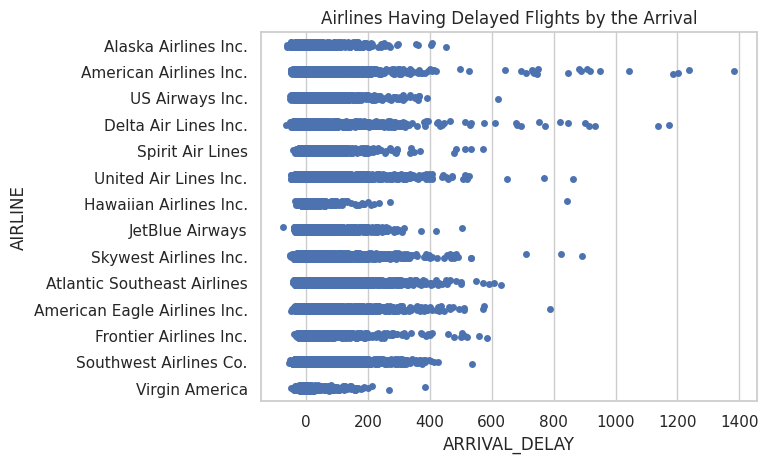

In [200]:
sns.set(style="whitegrid")
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=flight_data, dodge=True, jitter=True
            ).set(title = "Airlines Having Delayed Flights by the Arrival");

We can see that , the flight American Airlines have the maximum flights delayed based on arrival.

 ## Total Arrival Delay Time by Airlines

In [201]:
flights_delay = flight_data.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('sum').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_SUM"})

In [202]:
flights_delay

,AIRLINE,ARRIVAL_DELAY_SUM
0,Alaska Airlines Inc.,12014.0
1,American Airlines Inc.,260643.0
2,American Eagle Airlines Inc.,302809.0
3,Atlantic Southeast Airlines,311759.0
4,Delta Air Lines Inc.,81781.0
5,Frontier Airlines Inc.,70784.0
6,Hawaiian Airlines Inc.,17420.0
7,JetBlue Airways,115035.0
8,Skywest Airlines Inc.,290526.0
9,Southwest Airlines Co.,427856.0


In [203]:
fig = px.bar(flights_delay,
             x='AIRLINE',
             y= 'ARRIVAL_DELAY_SUM',
             title = 'Total Time Taken By Flight Operators in Arrival Delay');
fig.show()

The flight operator Southwest Airline share the maximum amount of arrival delay time, while on the contrary, Virgin America Airlines are the least delayed flights on arrival

## Departure Delay

In [204]:
flights_depart_delay = flight_data.groupby('AIRLINE', as_index= False)['DEPARTURE_DELAY'].agg('sum').rename(columns={"DEPARTURE_DELAY":"DEPARTURE_DELAY_SUM"})

In [205]:
flights_depart_delay

,AIRLINE,DEPARTURE_DELAY_SUM
0,Alaska Airlines Inc.,24304.0
1,American Airlines Inc.,277949.0
2,American Eagle Airlines Inc.,252524.0
3,Atlantic Southeast Airlines,307122.0
4,Delta Air Lines Inc.,201087.0
5,Frontier Airlines Inc.,65938.0
6,Hawaiian Airlines Inc.,11969.0
7,JetBlue Airways,116646.0
8,Skywest Airlines Inc.,290491.0
9,Southwest Airlines Co.,555575.0


In [206]:
fig = px.bar(flights_depart_delay,
             x='AIRLINE',
             y= 'DEPARTURE_DELAY_SUM',
             title='Total Time taken by Flight Operators in the Departure Delays');
fig.show()

SouthWest Airlines are the most late operating flights,while Virgin America are the least amongst the flight operators

## Comparison of the Total Arrival and Delayed Time

In [207]:
merged_df = pd.merge(flights_delay,flights_depart_delay, on ='AIRLINE')

In [208]:
merged_df

,AIRLINE,ARRIVAL_DELAY_SUM,DEPARTURE_DELAY_SUM
0,Alaska Airlines Inc.,12014.0,24304.0
1,American Airlines Inc.,260643.0,277949.0
2,American Eagle Airlines Inc.,302809.0,252524.0
3,Atlantic Southeast Airlines,311759.0,307122.0
4,Delta Air Lines Inc.,81781.0,201087.0
5,Frontier Airlines Inc.,70784.0,65938.0
6,Hawaiian Airlines Inc.,17420.0,11969.0
7,JetBlue Airways,115035.0,116646.0
8,Skywest Airlines Inc.,290526.0,290491.0
9,Southwest Airlines Co.,427856.0,555575.0


In [209]:
fig=px.histogram(merged_df,
                 x='AIRLINE',
                 y=['ARRIVAL_DELAY_SUM'	,'DEPARTURE_DELAY_SUM'],
                 barmode='group',
                 title='Time Comparison of Airlines Arrival and Departure Delays');
fig.show()

Observation


1.   American Eagle Airlines is the only one having less departure delays comapred to Arrival Delays.
2.   Sky West Airlines have similar delays in Arrival and Departure.
3.   There is a direct relationship between Arrival Delays and Departure Delays.But their are outliers and better performers like HAwaiian, American Eagle Airlines   







## Average Arrival Delay Time of Flights

In [210]:
flights_arrival_avg = flight_data.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('mean').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_AVG"})

In [211]:
fig = px.scatter(flights_arrival_avg,
                 x='AIRLINE',
                 y='ARRIVAL_DELAY_AVG',
                 title = 'Average time consumed in Arrival Delays');
fig.show()

American Eagle Airlines have the highest average arrival delay time, but if you take a look in the total arrival time delay, its much lesser

## Average Departure Delay Time

In [212]:
flights_departure_avg = flight_data.groupby('AIRLINE', as_index= False)['DEPARTURE_DELAY'].agg('mean').rename(columns={"DEPARTURE_DELAY":"DEPARTURE_DELAY_AVG"})

In [213]:
fig= px.pie(flights_departure_avg,
            values = 'DEPARTURE_DELAY_AVG',
            names ='AIRLINE',
            title = 'Average Time taken by Flights in Departing');
fig.show()

Aagain as the relationship of proportion stands its the American Eagle Airlines, having the higher average departure delay time.

## AVG delay comparison

In [214]:
avg_merge = pd.merge(flights_arrival_avg,flights_departure_avg, on= 'AIRLINE')
avg_merge

,AIRLINE,ARRIVAL_DELAY_AVG,DEPARTURE_DELAY_AVG
0,Alaska Airlines Inc.,3.084467,6.220630
1,American Airlines Inc.,20.466667,21.784544
2,American Eagle Airlines Inc.,40.406859,33.535724
3,Atlantic Southeast Airlines,21.332900,20.904029
4,Delta Air Lines Inc.,4.398956,10.803578
5,Frontier Airlines Inc.,34.294574,31.884913
6,Hawaiian Airlines Inc.,9.360559,6.428034
7,JetBlue Airways,17.977028,18.166329
8,Skywest Airlines Inc.,20.978121,20.837171
9,Southwest Airlines Co.,14.738916,19.049374


In [215]:
fig = px.line(avg_merge,
              y=['ARRIVAL_DELAY_AVG',	'DEPARTURE_DELAY_AVG'],
              x='AIRLINE',
              title ='Comparison of Average Arrival Delay and Departure Delay');
fig.show()

The above graph shows us about the average Arrival Delay and Departure Delay time of flight operators.

In [216]:
flights_df = flight_data.copy()

In [217]:
flights_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,2015,1,9,5,337,N641VA,FLL,LAX,1855,1900.0,...,-29.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America
139996,2015,1,9,5,357,N854VA,BOS,SFO,1859,1856.0,...,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America
139997,2015,1,9,5,593,N844VA,PSP,SFO,1905,1855.0,...,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America
139998,2015,1,9,5,1949,N841VA,LAX,SFO,1930,1926.0,...,9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America


# Step3-Data Preparation for Machine Learning

## Correlation of columns

In [218]:
corr_df = flights_df.corr()

<ipython-input-218-41ed46021298>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [219]:
corr_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.257388,0.003617,-0.058671,-0.053584,0.001681,0.040745,-0.049246,...,-0.028564,-0.011000,-0.001256,0.010064,0.024976,0.057637,-0.005030,0.000798,0.021937,0.074885
DAY_OF_WEEK,NaN,NaN,-0.257388,1.000000,0.008935,0.002587,0.003257,0.043835,0.008849,0.003175,...,-0.001931,-0.013324,0.054050,-0.001432,-0.004123,-0.017850,0.006349,0.008025,0.027405,-0.042706
FLIGHT_NUMBER,NaN,NaN,0.003617,0.008935,1.000000,-0.002302,0.009000,0.038408,0.062781,0.015255,...,-0.023086,-0.003484,0.061619,0.005427,0.089493,-0.021972,-0.008667,0.022472,0.082743,0.006612
SCHEDULED_DEPARTURE,NaN,NaN,-0.058671,0.002587,-0.002302,1.000000,0.948797,0.153380,-0.075507,0.919745,...,0.745674,0.580255,0.135118,0.002871,0.008599,-0.095765,-0.009594,-0.060323,0.171761,-0.037367
DEPARTURE_TIME,NaN,NaN,-0.053584,0.003257,0.009000,0.948797,1.000000,0.233737,-0.063086,0.967848,...,0.745586,0.607108,0.213737,0.005798,0.007098,-0.075038,-0.006594,-0.013506,0.240380,-0.022569
DEPARTURE_DELAY,NaN,NaN,0.001681,0.043835,0.038408,0.153380,0.233737,1.000000,0.082355,0.220219,...,0.139136,0.073420,0.949574,0.026867,0.034823,0.108235,0.007045,0.574466,0.610709,0.252005
TAXI_OUT,NaN,NaN,0.040745,0.008849,0.062781,-0.075507,-0.063086,0.082355,1.000000,-0.035975,...,-0.056109,-0.043843,0.263150,0.012130,0.006201,0.387773,-0.008794,-0.027262,-0.114561,0.122733
WHEELS_OFF,NaN,NaN,-0.049246,0.003175,0.015255,0.919745,0.967848,0.220219,-0.035975,1.000000,...,0.754320,0.630029,0.206477,0.006194,0.003144,-0.066100,-0.007508,-0.022825,0.214502,-0.030133


## Correlation Plot

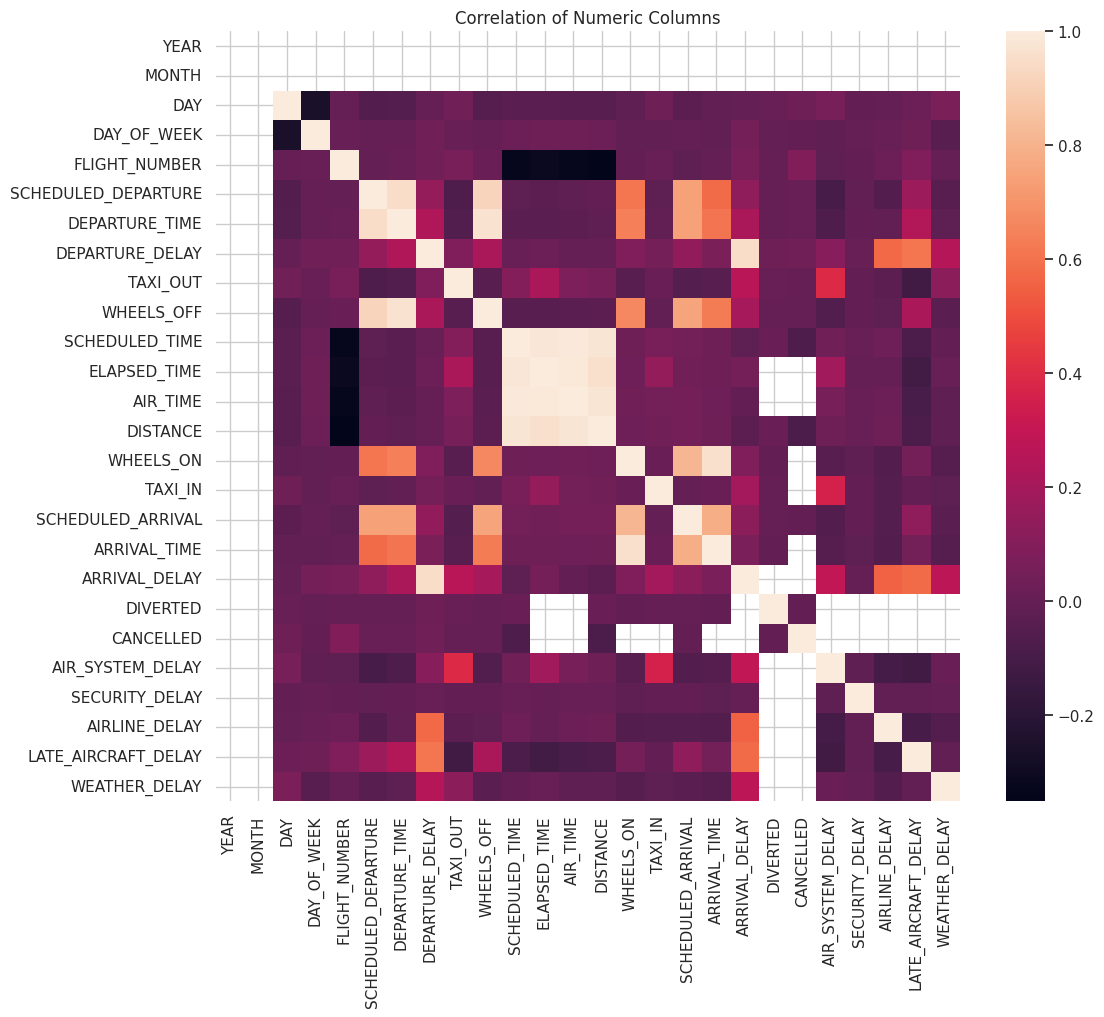

In [220]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_df);
plt.title('Correlation of Numeric Columns');

In [221]:
flights_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,140000.0,140000.0,140000.000000,140000.000000,140000.000000,140000.000000,136302.000000,136302.000000,136183.000000,136183.000000,...,140000.000000,136035.000000,135787.000000,140000.000000,140000.000000,45218.000000,45218.000000,45218.000000,45218.000000,45218.000000
mean,2015.0,1.0,4.982579,4.106429,2242.926036,1321.725371,1341.009061,18.922202,17.073225,1363.715816,...,1500.876771,1480.875326,16.912547,0.002586,0.027507,14.201690,0.071830,17.782211,26.166305,3.415454
std,0.0,0.0,2.533886,1.820333,1817.281353,471.249193,490.920341,45.408369,10.681587,491.656109,...,489.281974,526.860353,48.623049,0.050784,0.163556,27.414501,1.737352,42.684258,43.481599,19.815410
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-42.000000,1.000000,1.000000,...,1.000000,1.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,3.000000,3.000000,752.000000,923.000000,931.000000,-3.000000,11.000000,946.000000,...,1120.000000,1109.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,5.000000,4.000000,1697.500000,1320.000000,1336.000000,2.000000,14.000000,1349.000000,...,1522.000000,1518.000000,3.000000,0.000000,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000
75%,2015.0,1.0,7.000000,5.000000,3429.000000,1720.000000,1737.000000,23.000000,19.000000,1752.000000,...,1912.000000,1917.000000,24.500000,0.000000,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000
max,2015.0,1.0,9.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,824.000000,107.000000,1380.000000,891.000000,771.000000


In [222]:
flights_df.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
FLIGHT_NUMBER               0
TAIL_NUMBER               295
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME           3698
DEPARTURE_DELAY          3698
TAXI_OUT                 3817
WHEELS_OFF               3817
SCHEDULED_TIME              0
ELAPSED_TIME             4213
AIR_TIME                 4213
DISTANCE                    0
WHEELS_ON                3965
TAXI_IN                  3965
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             3965
ARRIVAL_DELAY            4213
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    136149
AIR_SYSTEM_DELAY        94782
SECURITY_DELAY          94782
AIRLINE_DELAY           94782
LATE_AIRCRAFT_DELAY     94782
WEATHER_DELAY           94782
AIRLINE                     0
dtype: int64

## Dropping Null Values from our Target column

In [223]:
flights_df = flights_df.dropna(subset=['AIRLINE_DELAY'])
flights_df['AIRLINE_DELAY'] = flights_df['AIRLINE_DELAY'].fillna(np.mean(flights_df['AIRLINE_DELAY']))

<ipython-input-223-6163d8a0711f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [224]:
flight_data = flights_df.copy()

# Step4 Implementing Machine Learning Algorithms

## Get the Training, Testing and Validation Data set using train_test_split()

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [226]:
train_val_df,test_df = train_test_split(flight_data,test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [227]:
print(train_df.shape)

(27130, 31)


In [228]:
print(val_df.shape)

(9044, 31)


In [229]:
print(test_df.shape)

(9044, 31)


In [230]:
flight_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE'],
      dtype='object')

## Input columns for our training, testing and validation set

In [231]:
input_cols = [ 'AIRLINE','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
'ARRIVAL_DELAY','LATE_AIRCRAFT_DELAY',
'AIR_SYSTEM_DELAY']

## Target Column(The column we want to predict)



In [232]:
target_col =['AIRLINE_DELAY']

In [233]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

## Finding the numeric cols

In [234]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
numeric_cols

['SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'AIR_SYSTEM_DELAY']

## Categorical column of our data set

In [235]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
categorical_cols

['AIRLINE']

## Describing the numerical columns

In [236]:
train_inputs[numeric_cols].describe()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,LATE_AIRCRAFT_DELAY,AIR_SYSTEM_DELAY
count,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,1435.209731,1501.026318,55.369112,21.079801,1525.507519,142.481533,148.648618,117.499853,823.578879,1576.674161,10.068964,1612.375378,1574.345042,61.536196,26.309252,14.229119
std,447.458685,480.071813,61.736880,15.397571,483.455922,73.614193,76.043740,72.557776,581.954698,579.630305,12.013140,484.397992,592.760959,60.818756,43.621994,27.106525
min,5.000000,1.000000,-24.000000,1.000000,1.000000,23.000000,19.000000,10.000000,31.000000,1.000000,1.000000,2.000000,1.000000,15.000000,0.000000,0.000000
25%,1100.000000,1141.000000,19.000000,12.000000,1158.000000,89.000000,93.000000,64.000000,397.000000,1244.000000,5.000000,1256.000000,1243.250000,25.000000,0.000000,0.000000
50%,1455.000000,1543.000000,39.000000,16.000000,1558.000000,128.000000,134.000000,102.000000,692.000000,1706.000000,6.000000,1655.000000,1710.000000,41.000000,10.000000,4.000000
75%,1810.000000,1905.000000,71.000000,25.000000,1920.000000,175.000000,184.000000,150.000000,1066.000000,2027.000000,10.000000,2015.000000,2033.000000,75.000000,35.000000,19.000000
max,2359.000000,2400.000000,1255.000000,176.000000,2400.000000,679.000000,724.000000,676.000000,4983.000000,2400.000000,179.000000,2359.000000,2400.000000,1237.000000,863.000000,570.000000


## Describing the Categorical Columns

In [237]:
train_inputs[categorical_cols].nunique()

AIRLINE    14
dtype: int64

This shows we have total of 14 Airline Carriers

## Imputation and One-Hot Encoding

### Check null values of numeric cols

In [238]:
train_inputs[numeric_cols].isna().sum()

SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
LATE_AIRCRAFT_DELAY    0
AIR_SYSTEM_DELAY       0
dtype: int64

## Imputation of numeric cols

In [239]:
from sklearn.impute import SimpleImputer

In [240]:
imputer = SimpleImputer(strategy = 'mean')

In [241]:
imputer.fit(flight_data[numeric_cols])

SimpleImputer()

In [242]:
list(imputer.statistics_)

[1438.4361316289974,
 1503.4502631695343,
 55.45599097704454,
 21.071763457030386,
 1528.1170551550267,
 142.58991994338538,
 148.77141846167456,
 117.64511920031846,
 824.1776504931664,
 1575.560484762705,
 10.054535804325711,
 1612.4741474633995,
 1572.4476978194525,
 61.63748949533372,
 26.16630545358043,
 14.201689592640099]

We haven't used the imputer.transform here as our columns don't have null values

## One Hot Encoding

In [243]:
flights_df[categorical_cols].nunique()

AIRLINE    14
dtype: int64

In [244]:
from sklearn.preprocessing import OneHotEncoder

In [245]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(flights_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [246]:
encoder.categories_

[array(['Alaska Airlines Inc.', 'American Airlines Inc.',
        'American Eagle Airlines Inc.', 'Atlantic Southeast Airlines',
        'Delta Air Lines Inc.', 'Frontier Airlines Inc.',
        'Hawaiian Airlines Inc.', 'JetBlue Airways',
        'Skywest Airlines Inc.', 'Southwest Airlines Co.',
        'Spirit Air Lines', 'US Airways Inc.', 'United Air Lines Inc.',
        'Virgin America'], dtype=object)]

In [247]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['AIRLINE_Alaska Airlines Inc.', 'AIRLINE_American Airlines Inc.', 'AIRLINE_American Eagle Airlines Inc.', 'AIRLINE_Atlantic Southeast Airlines', 'AIRLINE_Delta Air Lines Inc.', 'AIRLINE_Frontier Airlines Inc.', 'AIRLINE_Hawaiian Airlines Inc.', 'AIRLINE_JetBlue Airways', 'AIRLINE_Skywest Airlines Inc.', 'AIRLINE_Southwest Airlines Co.', 'AIRLINE_Spirit Air Lines', 'AIRLINE_US Airways Inc.', 'AIRLINE_United Air Lines Inc.', 'AIRLINE_Virgin America']


In [248]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

### printing our training ,testing,validation values

In [249]:
print('train_inputs:', train_inputs.shape)
print('train_target:', train_target.shape)
print('val_inputs:', val_inputs.shape)
print('val_target:', val_target.shape)
print('test_inputs:', test_inputs.shape)
print('test_target:', test_target.shape)

train_inputs: (27130, 31)
train_target: (27130, 1)
val_inputs: (9044, 31)
val_target: (9044, 1)
test_inputs: (9044, 31)
test_target: (9044, 1)


### Scaling numeric cols

In [250]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
scaler.fit(flights_df[numeric_cols])

MinMaxScaler()

In [251]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### Joining encoded cols

In [252]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

### Saving interediate result to parquet format

In [253]:
!pip install pyarrow --quiet

In [254]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

### comparing wall time of raw,parque data

In [255]:
%%time
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

CPU times: user 15 ms, sys: 1.96 ms, total: 17 ms
Wall time: 21 ms


In [256]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_target = pd.read_parquet('train_target.parquet')[target_col]
val_target = pd.read_parquet('val_target.parquet')[target_col]
test_target = pd.read_parquet('test_target.parquet')[target_col]

CPU times: user 74.5 ms, sys: 16.1 ms, total: 90.6 ms
Wall time: 109 ms


We can see that the wall time of reading this data is less than 1 second, which is pretty much faster compared to the .csv format

# Linear Regression

In [257]:
from sklearn.linear_model import LinearRegression

In [258]:
model = LinearRegression()

In [259]:
model.fit(x_train, train_target)

LinearRegression()

In [260]:
train_preds = model.predict(x_train)

In [261]:
train_preds

array([[33.37084591],
       [-0.53856704],
       [ 7.72500865],
       ...,
       [41.85254961],
       [14.65607674],
       [-3.35252617]])

In [262]:
val_preds = model.predict(x_test)
val_preds

array([[ 9.06217856],
       [ 2.04632507],
       [ 1.52147135],
       ...,
       [-3.50932367],
       [76.27543795],
       [12.21631292]])

## RMSE for the data set

In [263]:
train_rmse = mean_squared_error(train_target, train_preds, squared=False)
train_rmse

17.74591532175714

In [264]:
val_rmse = mean_squared_error(val_target, val_preds, squared=False)
val_rmse

61.1075824513407

Training set has an RMSE of 17.74 and Validation set has an RMSE of 61.10 which is three times, it shows how our data set is populated

### Helper Function to Evaluate the Model

In [265]:
def evaluate(model):
    train_preds = model.predict(x_train)
    train_rmse = mean_squared_error(train_target, train_preds, squared=False)
    val_preds = model.predict(x_val)
    val_rmse = mean_squared_error(val_target, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds
    
#Now, Let us write a function to evaluate the Test Set.

def predict(model):
     test_preds = model.predict(x_test)
     test_rmse = mean_squared_error(test_target, test_preds, squared=False)
     return test_rmse,test_preds

# Ridge regression

In [266]:
from sklearn.linear_model import Ridge
model1 = Ridge(random_state=42)

In [267]:
%%time
model1.fit(x_train, train_target)

CPU times: user 15.2 ms, sys: 9.94 ms, total: 25.2 ms
Wall time: 31.2 ms


Ridge(random_state=42)

In [268]:
evaluate(model1)

(17.867999548659558,
 20.44850037974956,
 array([[33.18542712],
        [ 0.2574961 ],
        [ 7.54938375],
        ...,
        [40.38826989],
        [14.68868909],
        [-2.83549721]]),
 array([[2.39774061],
        [1.27655196],
        [2.0699617 ],
        ...,
        [3.75948112],
        [2.17263997],
        [9.88265208]]))

In [269]:
predict(model1)

(17.439321567045845,
 array([[10.31924847],
        [ 3.24018732],
        [ 2.87472748],
        ...,
        [-2.94513153],
        [74.30852581],
        [11.66661366]]))

This model gives the evaluation score of 17.86, while the prediction goes at 17.43 whichis similar

# Random Forest

In [270]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [271]:
%%time
model2.fit(x_train, train_target)

<timed eval>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



CPU times: user 13.9 s, sys: 47.3 ms, total: 14 s
Wall time: 9.63 s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [272]:
evaluate(model2)

(12.099361721777015,
 20.995004734554183,
 array([22.21212619,  1.4649023 ,  6.8253564 , ..., 44.45671253,
        13.30677853,  0.42052344]),
 array([2.85338247, 2.15418176, 0.        , ..., 3.13643628, 2.42649111,
        9.48015088]))

In [273]:
predict(model2)

(20.163652044716812,
 array([10.09019092,  1.22191654,  2.29065973, ...,  3.68589037,
        81.81486398,  9.97953405]))

The RandomForest Regressor model predicts the output at 20.16s which is near to what Ridge Regressor Predicted

# Gradient Boosting

In [274]:
from xgboost import XGBRegressor
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [275]:
%%time
model3.fit(x_train, train_target)

CPU times: user 11.8 s, sys: 47.8 ms, total: 11.8 s
Wall time: 8.08 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [276]:
evaluate(model3)

(7.447656133007966,
 22.350323433646977,
 array([ 4.8277965 ,  3.0082905 ,  6.892284  , ..., 48.242035  ,
        19.367636  , -0.99621916], dtype=float32),
 array([ 2.0477803 , -0.67931974,  0.41490218, ...,  2.145085  ,
         2.575667  ,  8.499479  ], dtype=float32))

The model evaluation gives the delay of 7.44 for training and 22.53 for validation

In [277]:
predict(model3)

(21.53849332254855,
 array([11.877354 ,  1.4052397,  2.3413367, ..., -3.412239 , 79.430435 ,
        12.580389 ], dtype=float32))

But the model prediction gives us the delay of 21.53 seconds, which is as per the validation set and is very less deviated

## Hyperparameter Tuning for Gradient Boosting

The function below will take the parameters and plot the overfitting curve for each of the hyperparameters

In [278]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(x_train, train_target)
    train_rmse = mean_squared_error(model.predict(x_train), train_target, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_target, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

The below functions will take the best parameters that we have tuned and will give the list as output

In [279]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}
best_params1 = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

Hyperparameter tuning for Gradient Boosting

In [280]:
def test_params1(**params):
    from xgboost import XGBRegressor
    model = XGBRegressor(random_state=42, n_jobs=-1,**params)
    model.fit(x_train, train_target)
    return evaluate(model), predict(model)
test_params1(max_depth=3,gamma = 3)

((14.027398807052604,
  22.06670666018533,
  array([28.44294  ,  7.4569664,  9.614353 , ..., 50.707928 , 13.675775 ,
         -1.540837 ], dtype=float32),
  array([ 2.0146723, -1.3788929,  1.3936797, ...,  5.6516767,  5.42792  ,
          4.27751  ], dtype=float32)),
 (19.173217593345907,
  array([ 8.296898  ,  2.8381233 ,  5.7313457 , ...,  0.14181179,
         81.13352   ,  8.603199  ], dtype=float32)))

The rmse of the above boosted model for training 14.02 and validation is 22.06

In [281]:
test_params1(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
objective='reg:squarederror', nthread=4,scale_pos_weight=1)

((4.993898648069985,
  20.828000896868108,
  array([ 7.9833813 ,  4.1682878 ,  8.877588  , ..., 49.2736    ,
         15.230349  ,  0.23957866], dtype=float32),
  array([ 1.6067724 ,  0.9255256 ,  0.81775254, ...,  2.5888672 ,
          3.0649743 , -1.3102947 ], dtype=float32)),
 (19.531805001444848,
  array([ 4.749636  ,  0.9707591 ,  0.73176056, ..., -1.6565069 ,
         88.569016  , 13.032599  ], dtype=float32)))

Here the Value of Training and validation model goes to 4.9 and 20.82, which is again in line with the previously validated models.


 ## n_estimators

CPU times: user 7.36 s, sys: 14.9 ms, total: 7.38 s
Wall time: 4.89 s


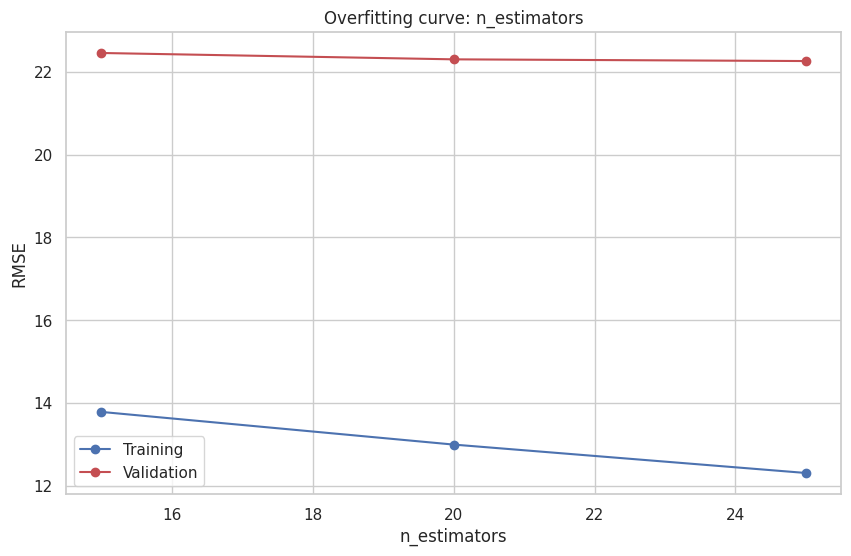

In [282]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [15, 20, 25], **best_params)

n_estimators parameter shows us the number of decision trees in the model. Here the estimators have to be low = 25, as our data set is widely spread and contains correlated columns

In [283]:
best_params['n_estimators'] = 25

## Max_Depth

CPU times: user 21.2 s, sys: 222 ms, total: 21.4 s
Wall time: 12.1 s


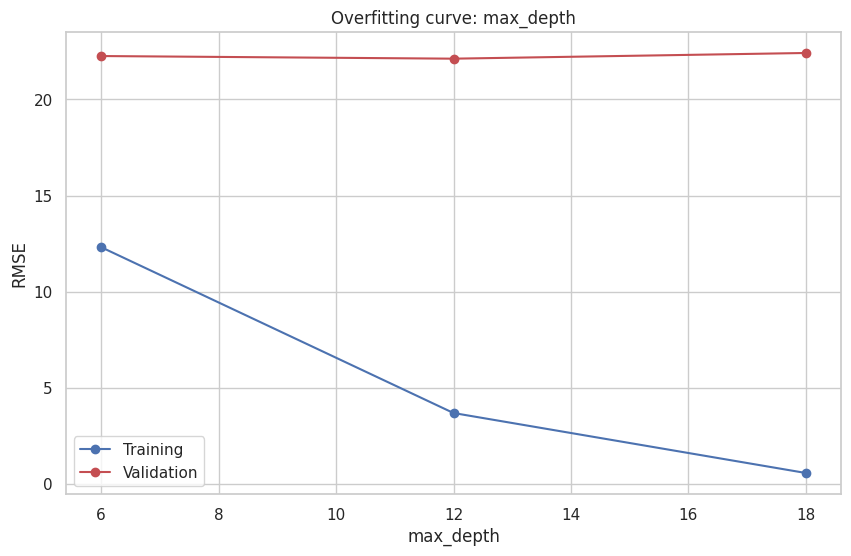

In [284]:
%%time 
test_param_and_plot(XGBRegressor, 'max_depth', [6, 12, 18], **best_params)

We can see that the overfitting curve shows a constatnt performance as compared to the test curve, the test curve is reducing the rmse, while the validation se shows a consistency in the rmse.

In [285]:
best_params['max_depth'] = 18

## Learning Rate

CPU times: user 37.1 s, sys: 594 ms, total: 37.7 s
Wall time: 20.4 s


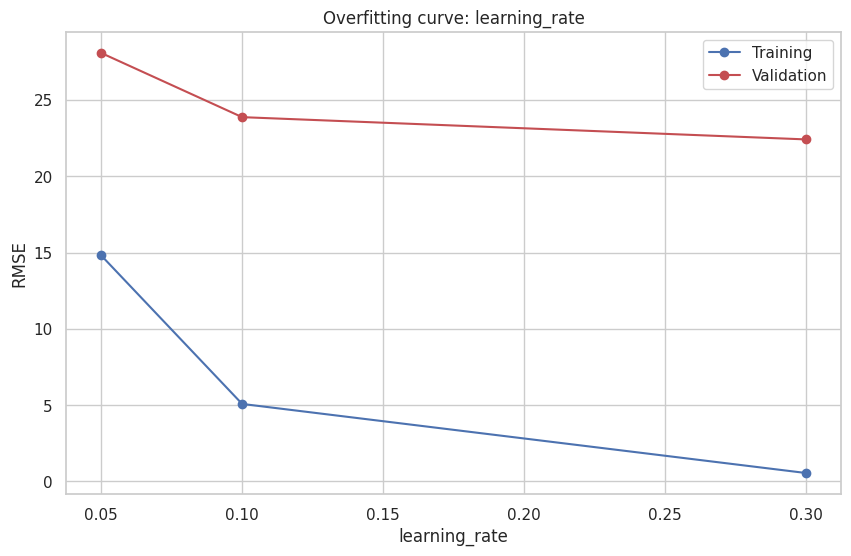

In [286]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.30], **best_params)

The learning rate is increasing as the values grows. It signifies that the dataset requires a higher learning rate to train and predict the values, which minimises the rmse.

In [287]:
best_params['learning_rate'] = 0.30

## Colsample_Bytree

CPU times: user 1min 1s, sys: 1.43 s, total: 1min 2s
Wall time: 36.8 s


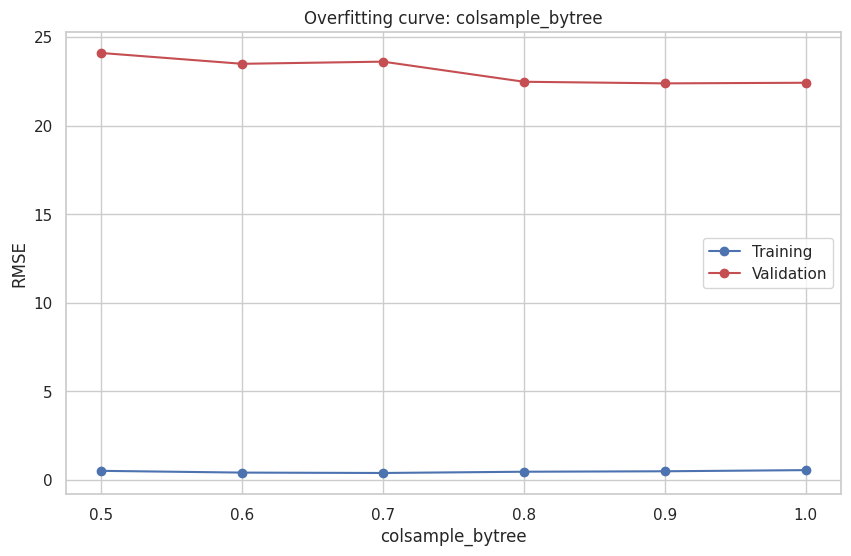

In [288]:
%%time
test_param_and_plot(XGBRegressor, 'colsample_bytree', [0.5, 0.6, 0.7,0.8,0.9,1], **best_params)

The above plot shows that the parameter gives the most reliable values with the input figure of 0.7 in training and validation test set

In [289]:
best_params['colsample_bytree'] = 0.8

## Combining the best_params for GradientBoosting

In [290]:
best_params

{'random_state': 42,
 'n_jobs': -1,
 'objective': 'reg:squarederror',
 'n_estimators': 25,
 'max_depth': 18,
 'learning_rate': 0.3,
 'colsample_bytree': 0.8}

In [291]:
test_params1(learning_rate =0.3, n_estimators=25, max_depth=18, colsample_bytree=0.8, objective='reg:squarederror')

((0.46661705676774295,
  22.477528002675243,
  array([1.4460187e-02, 2.0033970e+00, 7.9412704e+00, ..., 4.8428822e+01,
         1.7140781e+01, 7.8083100e-03], dtype=float32),
  array([ 2.4053156 , 10.621569  ,  0.23317088, ...,  4.745231  ,
          0.4974354 , 12.079337  ], dtype=float32)),
 (22.229564594788297,
  array([11.612559  ,  0.22063811,  0.53275174, ...,  1.0363868 ,
         90.48034   , 11.425552  ], dtype=float32)))

So these are the final values after tuning the above hyperparameters :

Train RMSE : 0.46

Validation RMSE : 22.47

Test RMSE : 22.22

# Hyperparameter Tuning for Random Forests



In [292]:
from sklearn.ensemble import RandomForestRegressor

In [293]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [294]:
%%time
model.fit(x_train, train_target)

<timed eval>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



CPU times: user 45.7 s, sys: 79.9 ms, total: 45.7 s
Wall time: 26.4 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [295]:
model.score(x_train, train_target)

0.9719525459534653

In [296]:
model.score(x_val, val_target)

0.825316603086744

## Plotting the Importance Features with strong Correlation 

In [297]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [298]:
importance_df.head(15)

,feature,importance
2,DEPARTURE_DELAY,0.376227
14,LATE_AIRCRAFT_DELAY,0.264726
15,AIR_SYSTEM_DELAY,0.135635
13,ARRIVAL_DELAY,0.103978
3,TAXI_OUT,0.015466
10,TAXI_IN,0.010482
0,SCHEDULED_DEPARTURE,0.009712
11,SCHEDULED_ARRIVAL,0.009318
6,ELAPSED_TIME,0.007707
8,DISTANCE,0.007683


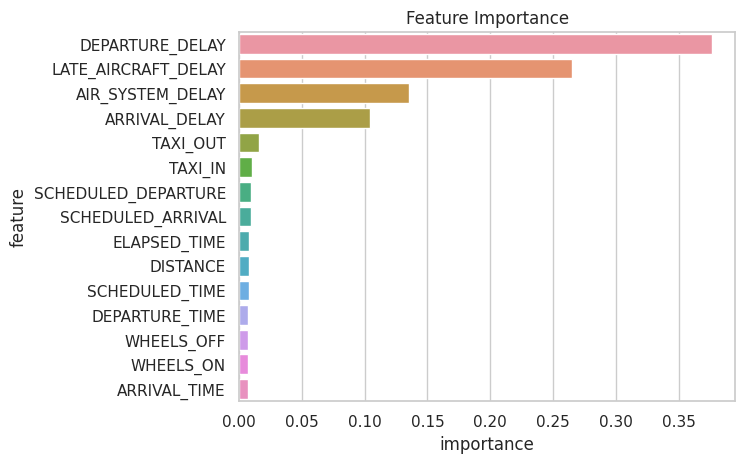

In [299]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');

The above graph shows that the Departure, Arrival,Late_Aircraft_Delay, Air_System_delay have the strongest correlation and is most responsible.

## n-estimators

In [300]:
from sklearn.ensemble import RandomForestRegressor

In [301]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=10)

In [302]:
model.fit(x_train, train_target)
model.score(x_train, train_target)
model.score(x_val, val_target)

<ipython-input-302-2da65986e340>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8199449655672487

In [303]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=20)
model.fit(x_train, train_target)
model.score(x_train, train_target)
model.score(x_val, val_target)

<ipython-input-303-5b7e8910ddb8>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8223989939211866

In [304]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=30)
model.fit(x_train, train_target)
model.score(x_train, train_target)
model.score(x_val, val_target)

<ipython-input-304-22845c6e54f4>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8291575015991652

In [305]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100)
model.fit(x_train, train_target)
model.score(x_train, train_target)
model.score(x_val, val_target)

<ipython-input-305-a46244fa3585>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.825316603086744

In [306]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=32)
model.fit(x_train, train_target)
model.score(x_train, train_target)
model.score(x_val, val_target)

<ipython-input-306-13fb23c9b29d>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8280696316484284

In [307]:
best_params1['n_estimators'] = 30

## max_depth and max_leaf_nodes

In [308]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(x_train, train_target)
    return model.score(x_train, train_target), model.score(x_val, val_target)

In [309]:
test_params(max_depth=5)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.8006529236288001, 0.8005213878622963)

In [310]:
test_params(max_depth=17)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.9675930902811836, 0.8228655689950557)

In [311]:
test_params(max_depth=20)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.9710788565032312, 0.8225835207829754)

In [312]:
best_params1['max_depth'] = 20

## Leaf Nodes

In [313]:
test_params(max_leaf_nodes=2**10)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.9674225334327202, 0.8212522331667292)

In [314]:
test_params(max_leaf_nodes=2**15)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.9718088865091286, 0.8218541976003177)

In [315]:
test_params(max_leaf_nodes=2**20)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.9718088865091286, 0.8218541976003177)

In [316]:
best_params1['max_leaf_nodes'] = 2**20

## min_impurity_decrease

In [317]:
test_params(min_impurity_decrease=9)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.799683209069738, 0.7855621077767039)

In [318]:
test_params(min_impurity_decrease=6)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.8198665463478635, 0.7947163428035495)

In [319]:
test_params(min_impurity_decrease=3)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.8524840447472003, 0.8026477742909565)

In [320]:
test_params(min_impurity_decrease=20)

<ipython-input-308-37164960666c>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.7568452121718384, 0.7556748257783202)

In [321]:
best_params1['min_impurity_decrease'] = 3

## Combining best params values seen so far

In [322]:
best_params1

{'random_state': 42,
 'n_jobs': -1,
 'objective': 'reg:squarederror',
 'n_estimators': 30,
 'max_depth': 20,
 'max_leaf_nodes': 1048576,
 'min_impurity_decrease': 3}

### creating a model with best params

In [323]:
model = RandomForestRegressor(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=30,
                               max_depth=20,
                               max_leaf_nodes = 2**20,
                               min_impurity_decrease = 3)

In [324]:
model.fit(x_train, train_target)

<ipython-input-324-4741d7d1d5b4>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=20, max_leaf_nodes=1048576,
                      min_impurity_decrease=3, n_estimators=30, n_jobs=-1,
                      random_state=42)

In [325]:
model.score(x_train, train_target), model.score(x_val, val_target)

(0.8487096738190435, 0.8001778700605414)

We can see from the above score that while using best tuned hyperparameters, our training set has a score of 84.48%, while our validation set has a score of 80.01%, which is very very optimal considering the data spread out.

# Summary
* The data is widely spread , so the RMSE is high if seen in figures.
* The Airline_Delay Predicted by model is around 17seconds.
* Our final model of RandomForestRegressor has a score of 84.48% for training, and 80.01% for testing, which is very optimal.
* Gradient Boosting provides more rmse  here compared to RandomForestsRegressor.
* Hawaiian Airlines are more reliable to travel with. 

# Future Work


*   Combine airline data of some airports
*   Predict the delay time based on particular delay inputs.
*   Improve the score of the model and make it more efficient.



## **References**

* Plotly Documentation: https://plotly.com/python/
* Vaibhav's Notebook of linear regression : https://jovian.com/ghost-smith9557/python-sklearn-linear-regression-ffd76
* Linear Regression from Jovian: https://jovian.com/ghost-smith9557/python-sklearn-linear-regression-ffd76
* Decision Trees and Random Forests: https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/decision-trees-and-random-forests